# Lab 3: Scikit Learn, Regression, Classification, and Clustering

Deadline Wednesday 4/29/20  11:59 pm 

**scikit-learn** is a popular machine learning package that contains a variety of models and tools. 

All objects within scikitt-learn share a uniform common basic API consisting of 3 interfaces: an _estimator_ interface for building and fitting models, a _predictor_ interface for making predictions, and a _transformer_ interface for converting data.

>The _estimator_  interface defines object mechanism and a fit method for learning a model from training data. All supervised and unsupervised learning algorithms are offered as objects implementing this interface. Other machine learning tasks such as _feature extraction_, _feature selection_, and _dimensionality reduction_ are provided as _estimators_. 

For more information, check the scikit-learn API paper: [https://arxiv.org/pdf/1309.0238v1.pdf]

The general form of using models in scikit-learn:


```
clf = someModel( )
clf.fit(x_train , y_tain)
```

For Example: 

```
clf = LinearSVC( )
clf.fit(x_train , y_tain)
```

>The _predictor_ adds a predict method that takes an array x_test and produces predictions for x_test, based on the learned parameters of the _estimator_. In supervised learning, this method typically return predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as __k-means__, where the predicted values are the cluster labels.

```
clf.predict(x_test)
```

>_transform_ method is used to modify or filter data before feeding it to a learning algorithm. It takes some new data as input and outputs a transformed version of that data. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as _transformers_ within the library. 

This is usually done with __fit_transform__ method. For example: 

```
PCA = RandomizedPCA (n_components = 2) 
x_train = PCA.fit_transform(x_train)
x_test = PCA.fit_transform(x_test)

```

In the example above, we first __fit__ the training set to find the PC components, then they are transformed. 

We can summarize the _estimator_ as follows:

* In _all estimators_
    - `model.fit()` : fit training data. In supervised learning, fit will take two parameters: the data x and labels y. In unsupervised learning, fit will take a single parameter: the data x

* In _supervised estimators_
    - `model.predict()` : predict the label of new test data for the given model. Predict takes one parameter: the new test data and returns the learned label for each item in the test data 
    - `model.score()` : Returns the score method for classification or regression methods.

* In _unsupervised estimators_

    - `model.transform()`: Tranform new data into new basis. Transform takes one parameter: new data and returns a new representation of that data based on the model
  
    


### Linear Regression

Let's start with a simple linear regression. First we will see an example of a simple linear regression. A simple straight line that fits the data. The formula representing the model is $$y = \beta_1 x +  \beta_0$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Let's start by using the following simple data for showing how linear regression works in scikit-learn. Then it will be your turn to build a regression model on a dataset

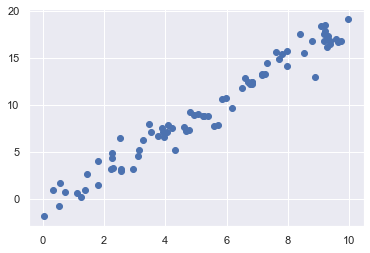

In [2]:
rng = np.random.RandomState(50)

x = 10 * rng.rand(80)
y = 2 * x - 1 + rng.randn(80)

plt.scatter(x,y)

After processing your data, the first step is to choose a model. For the dataset above, we are going to pick "Linear Regression" model. Simply import your model:

In [3]:
from sklearn.linear_model import LinearRegression

Next, pick the model hyperparameters

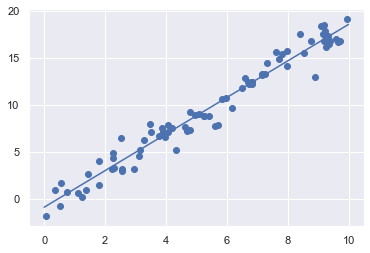

In [4]:

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

We can check the model settings: 

In [5]:
print(model.coef_[0])
print(model.intercept_)

1.944535887214308
-0.8492545699739527


### Linear regression on scikit-learn datasets

You can use datasets provided by scikit-learn as well. In the example below, we will apply linear regression to the **diabetes** dataset.

In the diabetes datasets, ten baseline variables; age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

(375, 2)
Coefficients: 
 [273.87765189  41.82906093]
Mean squared error: 4536.12
R-squared: 0.06


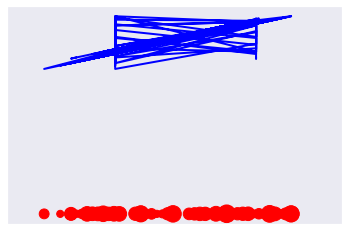

In [25]:
# Importing diabetes dataset
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
# Use only one feature -- the following code creates a 1-dimensional 
# array containing just the second feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_data = diabetes_X[:,:,:2]
nsamples, nx, ny = diabetes_X_data.shape
diabetes_train = diabetes_X_data.reshape((nsamples,nx*ny))

# Split the data into training/testing sets
diabetes_X_train,diabetes_X_test , diabetes_y_train, diabetes_y_test = train_test_split(
                                     diabetes_train, diabetes.target, test_size = 0.15 )

print(diabetes_X_train.shape)
# Create linear regression object
m1 = LinearRegression()


# Train the model with training data 
m1.fit(diabetes_X_train, diabetes_y_train)

# Make predictions on test data 
diabetes_y_pred = m1.predict(diabetes_X_test)

#print the coefficient 
print('Coefficients: \n', m1.coef_)

#print the mean squared error
print('Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))


# print the r-squared
print('R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


# Plot 
plt.scatter(diabetes_X_test[:,0],diabetes_X_test[:,1],diabetes_y_test,  color='red')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()


As you can see, the prediction is not very good. Maybe we can try something different!

#### Exercise 3.1

Run the linear regression on diabetes data with **all the features** in the dataset. 
Calculate the mean squared error and compare the two models. Did using all available features improve the performance ?

In [72]:
#Your code goes here



diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_data = diabetes_X[:,:,:]
nsamples, nx, ny = diabetes_X_data.shape
diabetes_train = diabetes_X_data.reshape((nsamples,nx*ny))

print(diabetes_X.shape)
print(diabetes_train)

# Split the data into training/testing sets
diabetes_x_train,diabetes_x_test , diabetes_y1_train, diabetes_y1_test = train_test_split(
                                     diabetes_train, diabetes.target, test_size = 0.15 )


# Create linear regression object
m2 = LinearRegression()


# Train the model with training data 
m2.fit(diabetes_x_train, diabetes_y1_train)

# Make predictions on test data 
diabetes_y1_pred = m2.predict(diabetes_x_test)

#print the coefficient 
print('Coefficients: \n', m2.coef_)

#print the mean squared error
print('Mean squared error: %.2f'% mean_squared_error(diabetes_y1_test, diabetes_y1_pred))


# print the r-squared
print('R-squared: %.2f' % r2_score(diabetes_y1_test, diabetes_y1_pred))





(442, 1, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
Coefficients: 
 [ -29.58764989 -234.15367866  490.25831145  317.47863967 -971.27021775
  613.94048104  153.64071048  144.92162597  877.8751954    95.41402502]
Mean squared error: 2679.54
R-squared: 0.46


It didn't make a huge difference in the MSE. Using all the feauture kind of improved the performance but very gradually.

Feature selection allows your estimator to perform a better job by decreasing the model complexity and overfitting.
scikit-learn provides several feature selection methods such as `SelectKBest` and `RFE`. Here is an example of using `RFE` or [Recursive feature elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) on diabetes dataset:

In [13]:
from sklearn.feature_selection import RFE

# Note that this piece of code works with training data and model from Exercise 3.1
# Either choose the same name for your variables or change the variable names below

rfe = RFE(estimator = m2 , n_features_to_select = 2 , step = 1)
rfe.fit(diabetes_x_train, diabetes_y1_train)

print(rfe.ranking_)

[9 5 1 4 2 3 8 6 1 7]


#### Exercise 3.2

Calculate and print the mean squared error using two features. Which model performs better? (the more complex one with all features, or the simpler model using fewer features)
(Note that `RFE` has a predict function you can use)



In [86]:
# Your code goes here 

print(diabetes_X_train.shape)
rfe1 = RFE(estimator = m1,n_features_to_select = 2 , step = 1)
rfe1.fit(diabetes_X_train,diabetes_y_train)
diabetes_y_pred = rfe1.predict(diabetes_X_test)
#print the mean squared error
print('Mean squared error of Model 1 with 2 feautures: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))

(375, 2)
Mean squared error of Model 1 with 2 feautures: 4536.12


In [88]:

rfe1 = RFE(estimator = m2,n_features_to_select = 10  , step = 1)
rfe1.fit(diabetes_x_train,diabetes_y1_train)
#print the mean squared error
diabetes_y1_pred = rfe1.predict(diabetes_x_test)
print('Mean squared error of Model 1 with all feautures: %.2f'% mean_squared_error(diabetes_y1_test, diabetes_y1_pred))
print(rfe1.ranking_)

Mean squared error of Model 1 with all feautures: 2679.54
[1 1 1 1 1 1 1 1 1 1]


MODEL 2 PERFORMS BETTER THAN MODEL ONE

### Linear regression on the Boston house price dataset

Now it's your turn to perform a linear regression on the Boston housing dataset.

#### Exercise 3.3

Train a set of linear regression models to predict the house prices for boston house dataset. You should use all the available features and train multiple linear regression models for:

* a) 30% training, 70% testing 
* b) 50% training, 50% testing
* c) 70% training, 30% testing
* d) 80% training, 20% testing

Plot the mean squared error for all models. 

(506, 13)
Coefficients model 1: 
 [-1.22800764e-01  8.51522005e-02  9.08763044e-02  8.81925594e-01
 -1.61410065e+01  2.60547773e+00 -5.60807802e-03 -1.91433336e+00
  3.14114032e-01 -1.33241342e-02 -7.18178159e-01  1.19515000e-02
 -6.86570149e-01]
Coefficients model 2: 
 [-1.46821336e-01  4.95673752e-02  3.93778677e-02  2.01884111e+00
 -2.33949789e+01  2.43153419e+00  8.78832505e-03 -1.56849237e+00
  3.73461045e-01 -1.30969893e-02 -9.29505844e-01  6.72666897e-03
 -6.15816966e-01]
Coefficients model 3: 
 [-1.09894678e-01  3.38624281e-02  5.35814111e-02  3.25484198e+00
 -1.92208212e+01  3.71679683e+00  7.56710279e-04 -1.46780298e+00
  3.39092124e-01 -1.34408784e-02 -1.19233428e+00  9.27403258e-03
 -5.47619740e-01]
Coefficients model 4: 
 [-1.18870667e-01  5.12965264e-02  4.03425839e-02  2.02888089e+00
 -1.63120583e+01  3.34123909e+00 -6.23924586e-03 -1.52858398e+00
  2.93735326e-01 -1.28030806e-02 -9.86346964e-01  8.08189941e-03
 -5.64501871e-01]
Mean squared error Model 1: 23.73
Mean squ

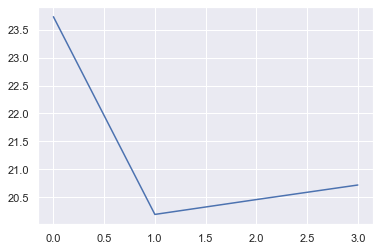

In [48]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
#Your code goes here
boston_X = boston.data[:, np.newaxis]
boston_X_data = boston_X[:,:,:]
nsamples, nx, ny = boston_X_data.shape
boston_train = boston_X_data.reshape((nsamples,nx*ny))

# Split the data into training/testing sets
boston_x_train,boston_x_test ,boston_y_train,boston_y_test = train_test_split(
                                     boston_train, boston.target, test_size = 0.70 )
boston_x2_train,boston_x2_test ,boston_y2_train,boston_y2_test = train_test_split(
                                     boston_train, boston.target, test_size = 0.50 )
boston_x3_train,boston_x3_test ,boston_y3_train,boston_y3_test = train_test_split(
                                     boston_train, boston.target, test_size = 0.30 )
boston_x4_train,boston_x4_test ,boston_y4_train,boston_y4_test = train_test_split(
                                     boston_train, boston.target, test_size = 0.20 )




# Create linear regression object
m1 = LinearRegression()
m2 = LinearRegression()
m3 = LinearRegression()
m4 = LinearRegression()


# Train the model with training data 
m1.fit(boston_x_train, boston_y_train)
m2.fit(boston_x2_train, boston_y2_train)
m3.fit(boston_x3_train, boston_y3_train)
m4.fit(boston_x4_train, boston_y4_train)

# Make predictions on test data 
boston_y_pred = m1.predict(boston_x_test)
boston_y2_pred = m2.predict(boston_x2_test)
boston_y3_pred = m3.predict(boston_x3_test)
boston_y4_pred = m4.predict(boston_x4_test)

#print the coefficient 
print('Coefficients model 1: \n', m1.coef_)
print('Coefficients model 2: \n', m2.coef_)
print('Coefficients model 3: \n', m3.coef_)
print('Coefficients model 4: \n', m4.coef_)

squarederrors = [mean_squared_error(boston_y_test, boston_y_pred),mean_squared_error(boston_y2_test, boston_y2_pred)
                ,mean_squared_error(boston_y3_test, boston_y3_pred),mean_squared_error(boston_y4_test, boston_y4_pred)]
#print the mean squared error
print('Mean squared error Model 1: %.2f'% squarederrors[0])
print('Mean squared error Model 2: %.2f'% squarederrors[1])
print('Mean squared error Model 3: %.2f'% squarederrors[2])
print('Mean squared error Model 4: %.2f'% squarederrors[3])

plt.plot(squarederrors)
# Plot 
print(boston_x_test.shape)
print(boston_y_test.shape)

models=[m1,m2,m3,m4]

# fig, axes = plt.subplots(nrows=13, ncols=1, figsize = (8,4))
# axes[0].scatter(boston_x_test[:,0],boston_y_test,  color='red')
# axes[1].scatter(boston_x_test[:,1],boston_y_test,  color='red',ax=ax2)
# axes[2].scatter(boston_x_test[:,2],boston_y_test,  color='red',ax=ax3)
# axes[3].scatter(boston_x_test[:,3],boston_y_test,  color='red',ax=ax4)
# axes[4].scatter(boston_x_test[:,4],boston_y_test,  color='red',ax=ax5)
# axes[5].scatter(boston_x_test[:,5],boston_y_test,  color='red',ax=ax6)
# axes[6].scatter(boston_x_test[:,6],boston_y_test,  color='red',ax=ax7)
# axes[7].scatter(boston_x_test[:,7],boston_y_test,  color='red',ax=ax8)
# axes[8].scatter(boston_x_test[:,8],boston_y_test,  color='red',ax=ax9)
# axes[9].scatter(boston_x_test[:,9],boston_y_test,  color='red',ax=ax10)
# axes[10].scatter(boston_x_test[:,10],boston_y_test,  color='red',ax=ax11)
# axes[11].scatter(boston_x_test[:,11],boston_y_test,  color='red',ax=ax12)
# axes[12].plt.scatter(boston_x_test[:,12],boston_y_test,  color='red',ax = ax10)
        
# plt.plot(boston_x_test, boston_y_pred, color='blue', linewidth=2)

# plt.xticks(())
# plt.yticks(())

# plt.show()






 #### Exercise 3.4 
 
Use `RFE` to find the best set of features for prediction. What are they? 
(Note that in order to find the best set of features for prediction, you need to consider all possible combinations, from 1 to d features, calculate the MSE for each one and pick the set of features that give you the min MSE)


Use the same train-test splits from 3.3, to train new models with the best set of features for prediction. Plot the mean squared error for each linear regression models and given train-test split.

Mean squared error of Model 4 with feautures: 65.97
[1 2]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
Mean squared error of Model 4 with feautures: 32.16
[1 1]
1
32.1626056466622
[1 1]
Coefficients model 1: 
 [-19.510011     7.22329599]
Coefficients model 2: 
 [-21.20757146   7.353263  ]
Coefficients model 3: 
 [-19.15986229   8.89182524]
Coefficients model 4: 
 [-16.97360364   8.10737972]
Mean squared 

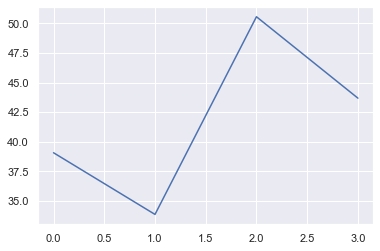

In [105]:
mse = []
rankings = []

for i in range(1,14):
    rfe1 = RFE(estimator = m4,n_features_to_select = i, step = 1)
    rfe1.fit(boston_x4_train,boston_y4_train)
    boston_y4_pred=rfe1.predict(boston_x4_test)
    print('Mean squared error of Model 4 with feautures: %.2f'% mean_squared_error(boston_y4_test, boston_y4_pred))
    mse.append(mean_squared_error(boston_y4_test, boston_y4_pred))
    rankings.append(rfe1.ranking_)
    print(rfe1.ranking_)

minMse = mse.index(min(mse))
bestFeauture = rankings[minMse]
minMse = mse[minMse]
print(mse.index(min(mse)))
print(minMse)
print(bestFeauture)





#4,5 index are the best feautures
boston_x_train,boston_x_test ,boston_y_train,boston_y_test = train_test_split(
                                     boston_train[:,[4,5]], boston.target, test_size = 0.70 )
boston_x2_train,boston_x2_test ,boston_y2_train,boston_y2_test = train_test_split(
                                     boston_train[:,[4,5]], boston.target, test_size = 0.50 )
boston_x3_train,boston_x3_test ,boston_y3_train,boston_y3_test = train_test_split(
                                     boston_train[:,[4,5]], boston.target, test_size = 0.30 )
boston_x4_train,boston_x4_test ,boston_y4_train,boston_y4_test = train_test_split(
                                     boston_train[:,[4,5]], boston.target, test_size = 0.20 )




# Create linear regression object
m1 = LinearRegression()
m2 = LinearRegression()
m3 = LinearRegression()
m4 = LinearRegression()


# Train the model with training data 
m1.fit(boston_x_train, boston_y_train)
m2.fit(boston_x2_train, boston_y2_train)
m3.fit(boston_x3_train, boston_y3_train)
m4.fit(boston_x4_train, boston_y4_train)

# Make predictions on test data 
boston_y_pred = m1.predict(boston_x_test)
boston_y2_pred = m2.predict(boston_x2_test)
boston_y3_pred = m3.predict(boston_x3_test)
boston_y4_pred = m4.predict(boston_x4_test)

#print the coefficient 
print('Coefficients model 1: \n', m1.coef_)
print('Coefficients model 2: \n', m2.coef_)
print('Coefficients model 3: \n', m3.coef_)
print('Coefficients model 4: \n', m4.coef_)

squarederrors = [mean_squared_error(boston_y_test, boston_y_pred),mean_squared_error(boston_y2_test, boston_y2_pred)
                ,mean_squared_error(boston_y3_test, boston_y3_pred),mean_squared_error(boston_y4_test, boston_y4_pred)]
#print the mean squared error
print('Mean squared error Model 1: %.2f'% squarederrors[0])
print('Mean squared error Model 2: %.2f'% squarederrors[1])
print('Mean squared error Model 3: %.2f'% squarederrors[2])
print('Mean squared error Model 4: %.2f'% squarederrors[3])

plt.plot(squarederrors)

    

#Your code goes here
Model Two Pefromed better with the feautres that were listed from the rankings which was feauture 4,5


### Classification:  SVM 

Support Vector Machines (SVM) are among the most useful and powerful supervised learning algorithm. Here we are going to look at an example of using SVM models in scikit-learn. Then, it will be your turn to try this model.

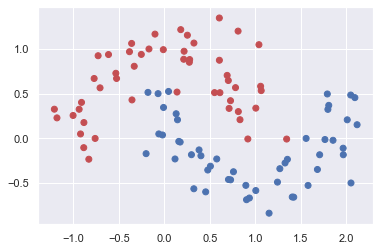

In [73]:
# Import make_moons from scikit learn to generate synthetic data
from sklearn.datasets import make_moons

# 2d classification dataset
Xs , ys = make_moons( n_samples = 100,noise = 0.2 , random_state = 0)


# train-test split

Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, ys , test_size = 0.15 )

#plot the data
colors = np.array(['r' , 'b'])
plt.scatter(Xs[:,0] , Xs[:,1]  ,c = colors[ys] )
plt.show()


We will perform both linear and nonlinear SVM on this synthetic dataset:

In [74]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

[[6 1]
 [0 8]]


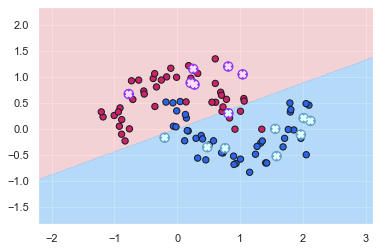

In [75]:
#Import SVM
from sklearn import svm

from matplotlib.colors import ListedColormap
from sklearn import metrics


cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# Fit data
clf1.fit(Xs_train, ys_train)

# Predict
ys_predict = clf1.predict(Xs_test)


#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(metrics.confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

Now we apply a non-linear svm classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[7 0]
 [0 8]]


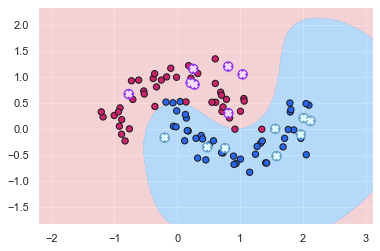

In [76]:
# clf2 is a nonlinear svm classifier

clf2 = svm.SVC(kernel = 'rbf')


# Fit data
clf2.fit(Xs_train, ys_train)

# Predict
ys_predict2 = clf2.predict(Xs_test)



#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict2))
print(metrics.confusion_matrix(ys_test, ys_predict2))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict2, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

### SVM on Wine quality dataset

#### Exercise 3.5

Now it's your turn to work with SVM. The wine data set is loaded below. You can learn more about the dataset by using `datasett.DESCR`. Here, you need to work with the first two features to train your model.

* Select the first two features for your X
* Split the dataset in two sets of training and testing data. Use 80% of the data for training and 20% for testing
* Perform linear and non-linear SVM on the dataset 
* Display the classification report and accuracy for both models

(178, 13) (178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


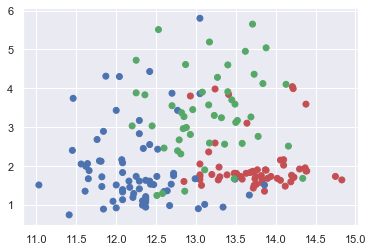

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.84      0.89      0.86        18
           2       1.00      0.50      0.67         8

    accuracy                           0.83        36
   macro avg       0.87      0.80      0.80        36
weighted avg       0.86      0.83      0.82        36

[[10  0  0]
 [ 2 16  0]
 [ 1  3  4]]


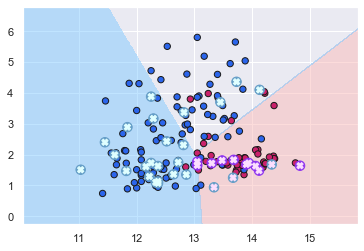

In [84]:
from sklearn.datasets import load_wine

Xwine_full , ywine = load_wine(return_X_y = True)

#Your code here
print(Xwine_full.shape,ywine.shape)
print(ywine)

Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xwine_full[:,:2], ywine , test_size = 0.20 )

# #plot the data
colors = np.array(['r', 'b','g'])
plt.scatter(Xwine_full[:,0] , Xwine_full[:,1]  ,c = colors[ywine] )
plt.show()

cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# Fit data
clf1.fit(Xs_train, ys_train)

# Predict
ys_predict = clf1.predict(Xs_test)


#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(metrics.confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(Xwine_full[:,0], Xwine_full[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    




Performing NonLinear SVM

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.89      0.89      0.89        18
           2       1.00      0.62      0.77         8

    accuracy                           0.86        36
   macro avg       0.89      0.84      0.84        36
weighted avg       0.88      0.86      0.86        36

[[10  0  0]
 [ 2 16  0]
 [ 1  2  5]]


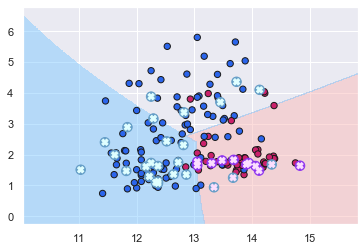

In [85]:
clf2 = svm.SVC(kernel = 'rbf')


# Fit data
clf2.fit(Xs_train, ys_train)

# Predict
ys_predict2 = clf2.predict(Xs_test)



#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict2))
print(metrics.confusion_matrix(ys_test, ys_predict2))

# Display the svm 
xx , yy = meshGrid(Xwine_full[:,0], Xwine_full[:,1], 0.01)



Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict2, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

#### Exercise 3.6

Scaling features is another step that can affect the performance of your classifier. For the wine data, scale the features using `StandardScaler` and perform linear SVM.  Display the classification report and accuracy. 
Did scaling data affect the classifier performance?

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.28      1.00      0.43        10
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00         8

    accuracy                           0.28        36
   macro avg       0.09      0.33      0.14        36
weighted avg       0.08      0.28      0.12        36

Accuracy : 27.77777777777778


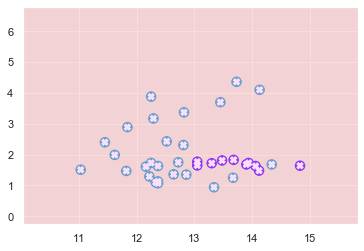

In [90]:
from sklearn.preprocessing import StandardScaler

#Your code here
scaler = StandardScaler()
Xs_train = scaler.fit_transform(Xs_train,ys_train)
cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# Fit data
clf1.fit(Xs_train, ys_train)

# Predict
ys_predict = clf1.predict(Xs_test)

metrics.accuracy_score(ys_test,ys_predict)
#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(f"Accuracy : {metrics.accuracy_score(ys_test,ys_predict)*100}")

# Display the svm 
xx , yy = meshGrid(Xwine_full[:,0], Xwine_full[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()





Significantly reduced the accuracy when we used Standard Scalar to transform data.

#### Exercise 3.7

scikit-learn has many other classifiers. Pick another classifier of your choice ( KNN, DecisionTree, NaiveBayes, ...) and apply it to the wine dataset. Display the classification report and accuracy.

In [99]:
#Your code goes here

from sklearn.neighbors import KNeighborsClassifier

Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xwine_full[:,:2], ywine , test_size = 0.20 )

model = KNeighborsClassifier(n_neighbors=9)
model.fit(Xs_train,ys_train)
predictions = model.predict(Xs_test)
score = metrics.accuracy_score(ys_test,predictions)
print(f"Accuracy: {score*100}")
print ("Confusion matrix")
print(metrics.confusion_matrix(ys_test,predictions))
print(metrics.classification_report(ys_test, predictions))



Accuracy: 83.33333333333334
Confusion matrix
[[ 7  1  0]
 [ 0 12  5]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      0.71      0.80        17
           2       0.69      1.00      0.81        11

    accuracy                           0.83        36
   macro avg       0.87      0.86      0.85        36
weighted avg       0.87      0.83      0.83        36



### Clustering

You have already seen an example of clustering using scikit-learn in lecture. In this section, you will apply `KMeans` algorithm to the wine dataset.

#### Exercise 3.8 
* First choose the first two features and apply kmeans clustering.
* Display cluster evaluation metrics`homogeneity_score` and `completeness_score` (both belong to sklearn.metrics)
* Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. ( This is to observe how good your model performs on the data)

Note: For displaying decision boundaries and data points follow these steps:

1. Use meshGrid function to get the mesh for your attributes
2. Obtain labels for each point in mesh and reshape it. ( Z = kmeans.predict(....))
3. Put the results into a color plot
    * Plot the colormesh --> plt.pcolormesh
    * Plot your data points --> plt.scatter
    * Plot the centroids --> plt.scatter
    * Set titles, x and y ranges
    * plt.show()

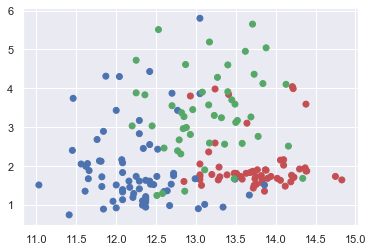

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 205.86557850340137
start iteration
done sorting
end inner loop
Iteration 1, inertia 176.13617171344788
start iteration
done sorting
end inner loop
Iteration 2, inertia 130.7894022016638
start iteration
done sorting
end inner loop
Iteration 3, inertia 103.13633503144655
start iteration
done sorting
end inner loop
Iteration 4, inertia 96.18958580392157
start iteration
done sorting
end inner loop
Iteration 5, inertia 95.55989885434997
start iteration
done sorting
end inner loop
Iteration 6, inertia 95.55989885434997
center shift 0.000000e+00 within tolerance 9.481819e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 153.78640710058863
start iteration
done sorting
end inner loop
Iteration 1, inertia 104.82519956932563
start iteration
done sorting
end inner loop
Iteration 2, inertia 96.58717305113566
start iteration
done sorting
end inner loop
Iteration 3, iner

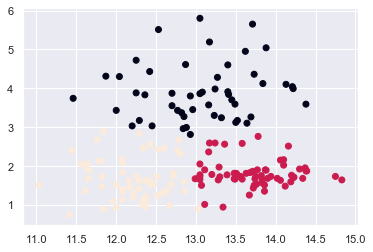

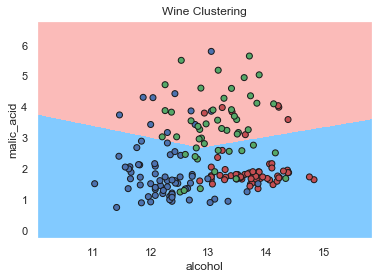

In [117]:
from sklearn.cluster import KMeans

Xwine_full , ywine = load_wine(return_X_y = True)

Xc = Xwine_full [:, :2]

colormap = np.array(['r' , 'b' , 'g'])
plt.scatter(Xc[:,0],Xc[:,1] , c = colormap[ywine])
plt.show()


kmeans = KMeans(n_clusters=3,n_init=3, init='random',tol=1e-4, random_state=200, 
                verbose=True).fit(Xc)

predictions = kmeans.predict(Xc)
plt.scatter(Xc[:,0], Xc[:,1], c=predictions)
xx , yy = meshGrid(Xc[:,0], Xc[:,1], 0.01)


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(Xc[:, 0], Xc[:, 1], c = colormap[ywine], cmap=cmap_bold,edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("alcohol")
plt.ylabel("malic_acid")
plt.title("Wine Clustering");

In [116]:
#homogeneity_score and completeness_score
print(f'Homogeneity Score: {metrics.homogeneity_score(ywine,predictions)}')
print(f'Completness Score: {metrics.completeness_score(ywine,predictions)}')
print(f'Accuracy Score:{metrics.accuracy_score(ywine,predictions)}')

Homogeneity Score: 0.41035077970969713
Completness Score: 0.4080524820388843
Accuracy Score:0.11235955056179775


#### Exercise 3.9

In the previous model you used the first two features: 'Alcohol' and 'Malic acid'. 
For this exercise, pick features 'Alcohol' and 'OD280/OD315 of diluted wines' (feature #1 and feature #12) as your
two attributes and perform the tasks in Exercise 3.8. (cluster, report metrics, draw decision boundaries)

Which model performs better?

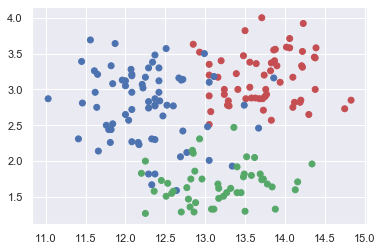

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 123.31903182603689
start iteration
done sorting
end inner loop
Iteration 1, inertia 118.16751839869283
start iteration
done sorting
end inner loop
Iteration 2, inertia 111.87260374269007
start iteration
done sorting
end inner loop
Iteration 3, inertia 101.08538614255767
start iteration
done sorting
end inner loop
Iteration 4, inertia 79.65622137931035
start iteration
done sorting
end inner loop
Iteration 5, inertia 62.09380818399045
start iteration
done sorting
end inner loop
Iteration 6, inertia 58.67586816502464
start iteration
done sorting
end inner loop
Iteration 7, inertia 58.387735638133805
start iteration
done sorting
end inner loop
Iteration 8, inertia 58.35578479226915
start iteration
done sorting
end inner loop
Iteration 9, inertia 58.32594553894382
start iteration
done sorting
end inner loop
Iteration 10, inertia 58.32594553894382
center shift 0.000000e+00 within tolerance 5.783071e-05
I

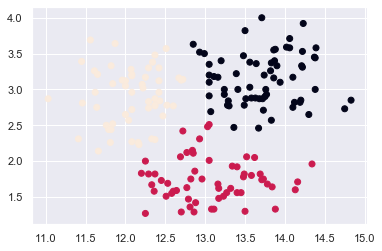

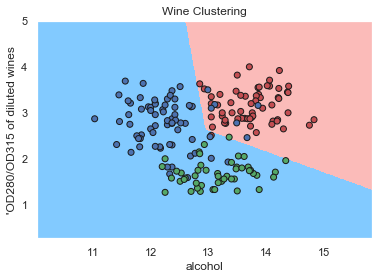

In [122]:
# Your code here

Xc = Xwine_full[:, [0,11]]

colormap = np.array(['r' , 'b' , 'g'])
plt.scatter(Xc[:,0],Xc[:,1] , c = colormap[ywine])
plt.show()


kmeans = KMeans(n_clusters=3,n_init=3, init='random',tol=1e-4, random_state=200, 
                verbose=True).fit(Xc)

predictions = kmeans.predict(Xc)
plt.scatter(Xc[:,0], Xc[:,1], c=predictions)
xx , yy = meshGrid(Xc[:,0], Xc[:,1], 0.01)


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(Xc[:, 0], Xc[:,1], c = colormap[ywine], cmap=cmap_bold,edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("alcohol")
plt.ylabel("'OD280/OD315 of diluted wines")
plt.title("Wine Clustering");

In [124]:
print(f'Homogeneity Score: {metrics.homogeneity_score(ywine,predictions)}')
print(f'Completness Score: {metrics.completeness_score(ywine,predictions)}')
print(f'Accuracy Score:{metrics.accuracy_score(ywine,predictions)}')

Homogeneity Score: 0.7072039236692641
Completness Score: 0.7006853440435565
Accuracy Score:0.38202247191011235


The second model performed better with higher homogeneity and completeness score. The accuracy was much higher than when i used the first two feautures instead of the 12th feauture